In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
median_home_price = pd.read_csv("ZipCode_File/Zip_Zhvi_AllHomes.csv")
median_home_price = median_home_price.loc[median_home_price['CountyName'] == 'San Diego'].rename(columns={'RegionName':'zip'})

median_home_price_sd = median_home_price[['zip', 'City', 'Metro', 'CountyName']].drop_duplicates()
median_home_price_sd.to_csv('City_zip.csv')

median_home_price_sd.head()
#median_price_income = pd.merge(median_income_df, med_home_price_df, how='inner', on='zip')

,zip,City,Metro,CountyName
117,91910,Chula Vista,San Diego-Carlsbad,San Diego
176,92126,San Diego,San Diego-Carlsbad,San Diego
197,91911,Chula Vista,San Diego-Carlsbad,San Diego
221,92109,San Diego,San Diego-Carlsbad,San Diego
224,92101,San Diego,San Diego-Carlsbad,San Diego


In [60]:
age_estimate = pd.read_csv('CSV Files/age_estimate_by_zip.csv')

#age_estimate = age_estimate.set_index('group_10yr')
#age_estimate = age_estimate.drop('Total Population', axis = 0)
age_estimate = age_estimate.loc[age_estimate['year'] == 2020]
age_estimate = age_estimate.loc[age_estimate['group_10yr'] == 'Total Population']  
#age_estimate = age_estimate.loc[age_estimate['sex'] == 'Female'] & age_estimate.loc[age_estimate['sex'] == 'Male']
age_estimate_f = age_estimate.loc[age_estimate['sex'] == 'Female']
age_estimate_m = age_estimate.loc[age_estimate['sex'] == 'Male']
age_estimate_all= age_estimate_m.append(age_estimate_f, ignore_index=True)
#age_estimate_all_gp = age_estimate_all.groupby('zip')
age_city = pd.merge(age_estimate_all, median_home_price_sd, on='zip', how='inner' )
age_city.sort_values(by=['zip']).groupby('City')
age_city = age_city[['sex', 'population', 'year', 'City', 'CountyName']].drop_duplicates()
#age_city = age_city.pivot_table('population', ['sex'], 'city')
age_city

,sex,population,year,City,CountyName
0,Male,9004,2020,Alpine,San Diego
1,Female,8882,2020,Alpine,San Diego
2,Male,8750,2020,Bonita,San Diego
3,Female,9123,2020,Bonita,San Diego
4,Male,2442,2020,Campo,San Diego
5,Female,2035,2020,Campo,San Diego
6,Male,37676,2020,Chula Vista,San Diego
7,Female,40063,2020,Chula Vista,San Diego
8,Male,41266,2020,Chula Vista,San Diego
9,Female,44188,2020,Chula Vista,San Diego


In [27]:
age_estimate_grp = age_estimate.groupby(['sex'])
age_estimate_grp.head().reset_index()

,group_10yr,Unnamed: 0,population,sex,year,zip
0,Under 10,27,928,Female,2020,91901
1,10 to 19,28,1066,Female,2020,91901
2,20 to 29,29,832,Female,2020,91901
3,30 to 39,30,928,Female,2020,91901
4,40 to 49,31,1110,Female,2020,91901
5,Under 10,37,988,Male,2020,91901
6,10 to 19,38,1246,Male,2020,91901
7,20 to 29,39,1023,Male,2020,91901
8,30 to 39,40,847,Male,2020,91901
9,40 to 49,41,995,Male,2020,91901


C:\Users\shefalis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


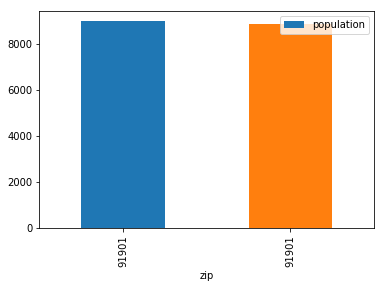

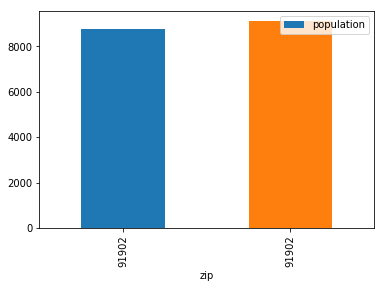

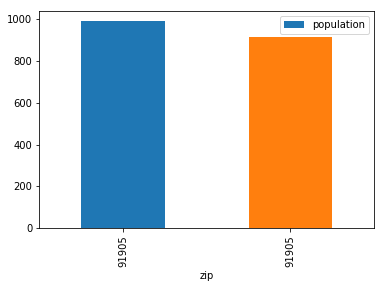

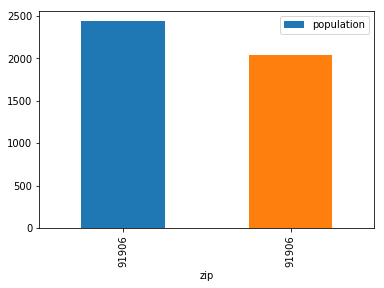

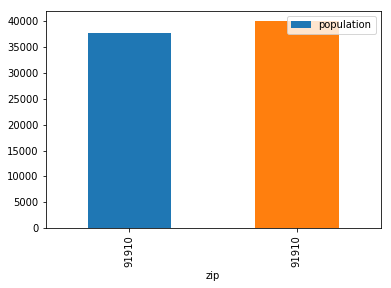

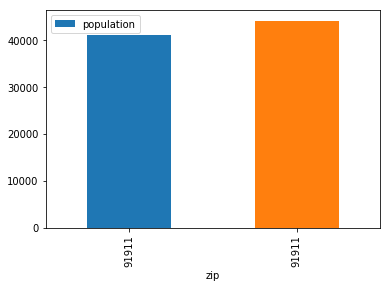

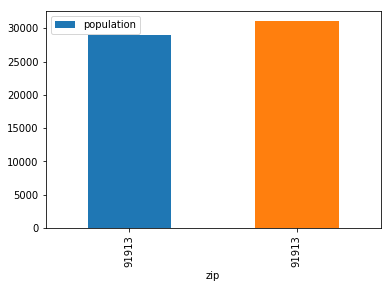

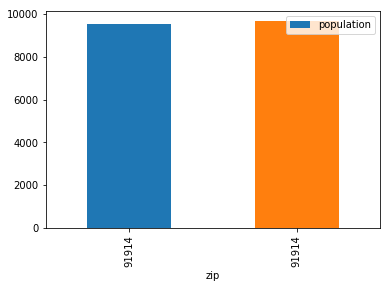

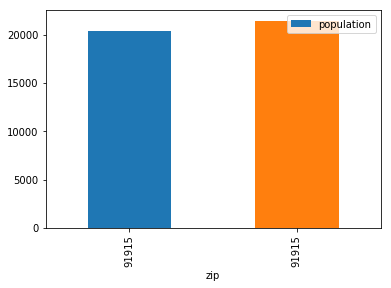

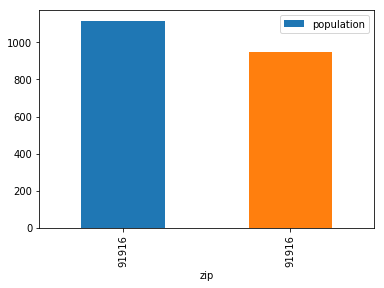

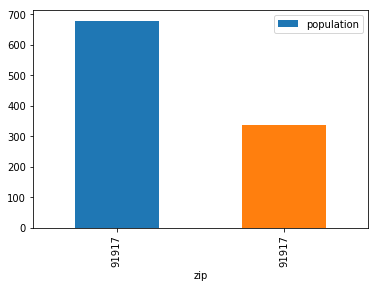

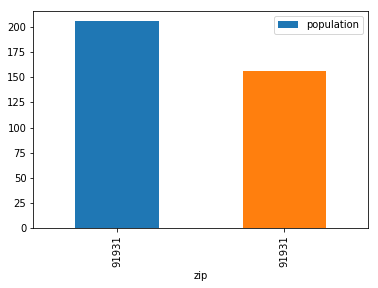

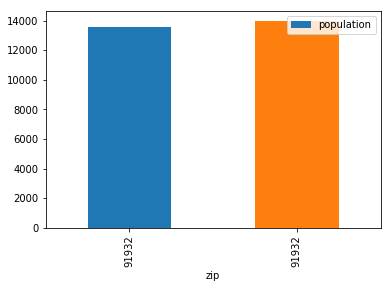

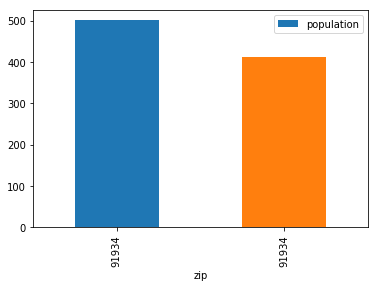

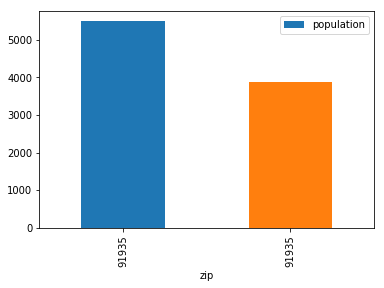

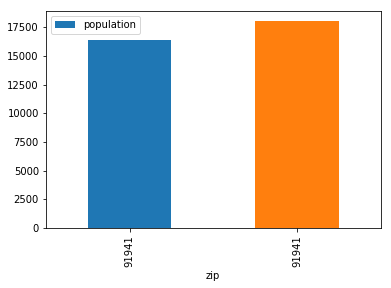

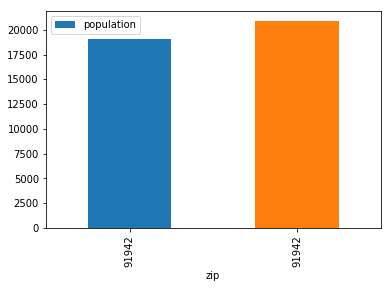

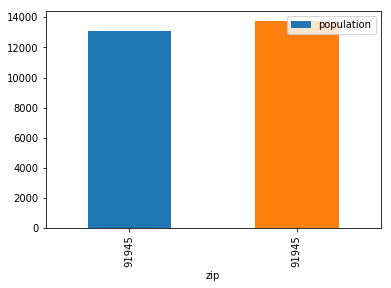

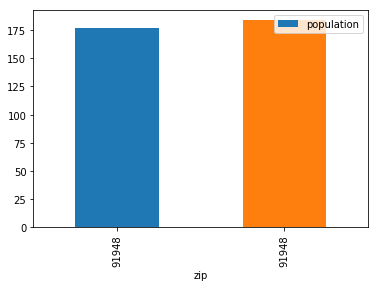

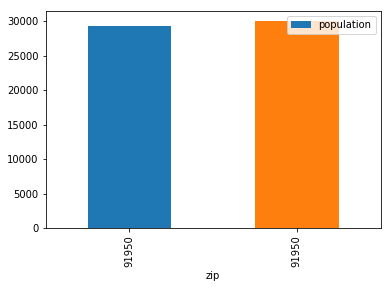

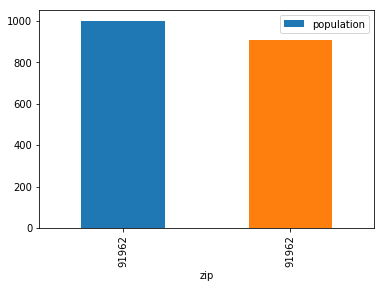

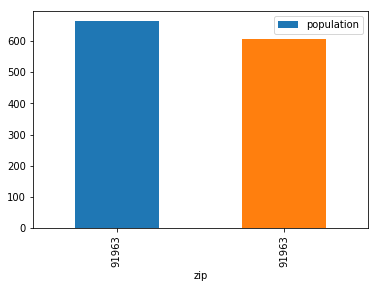

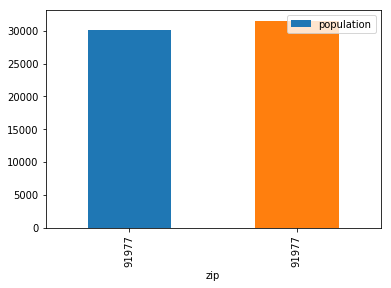

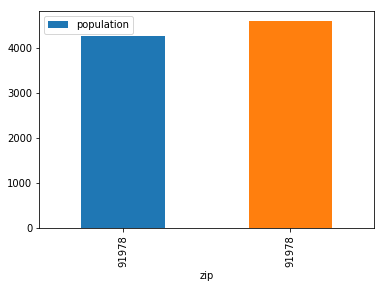

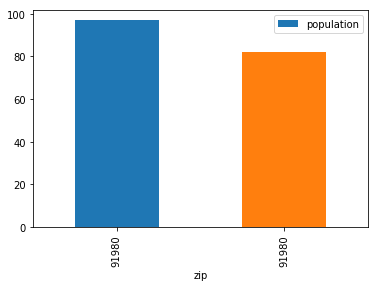

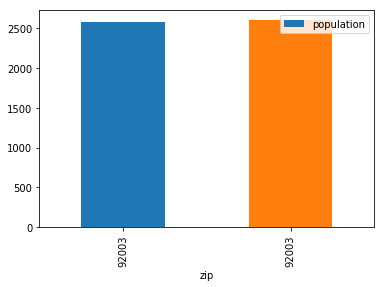

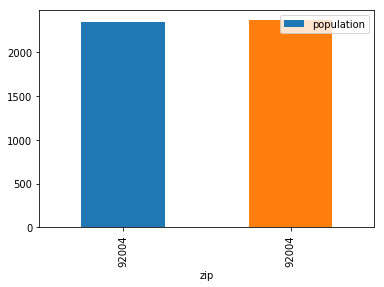

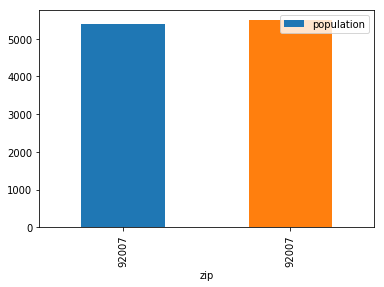

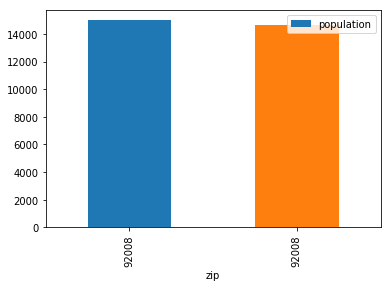

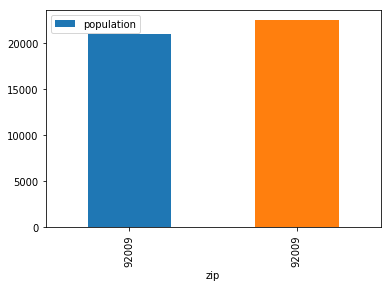

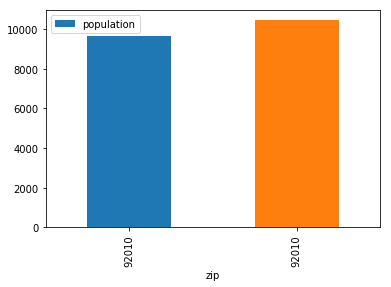

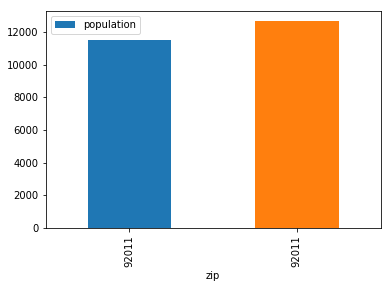

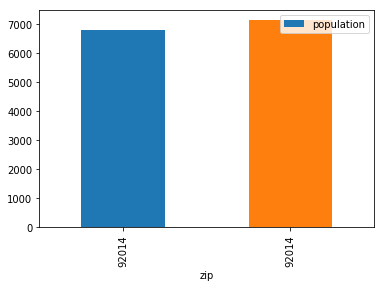

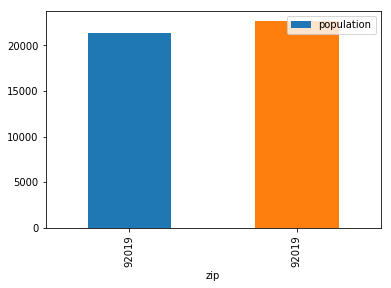

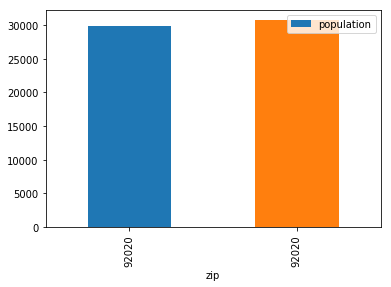

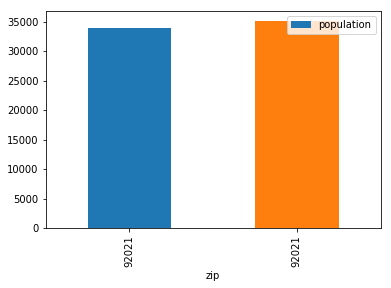

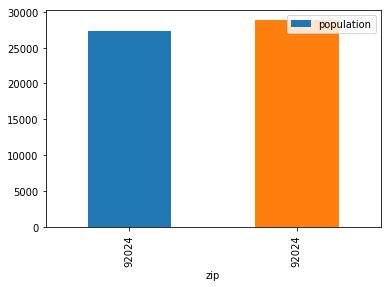

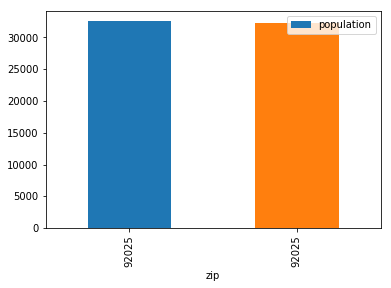

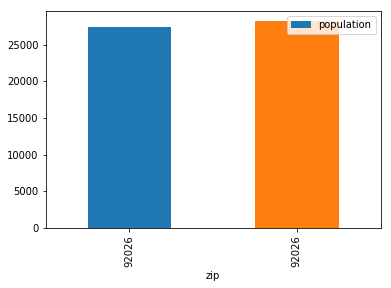

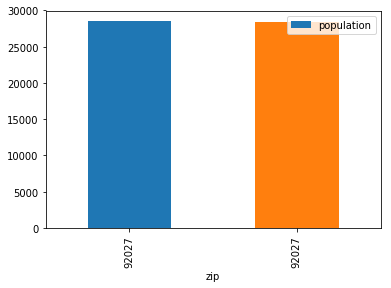

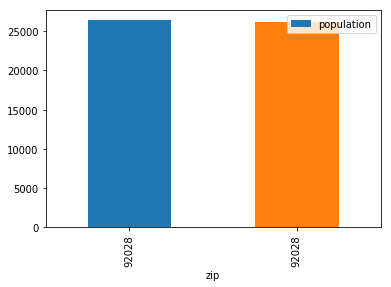

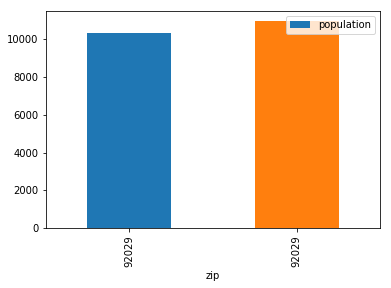

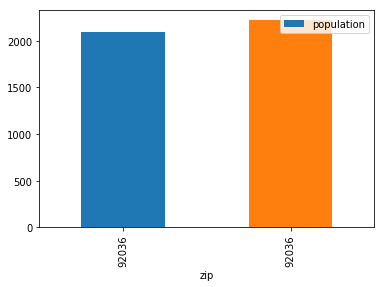

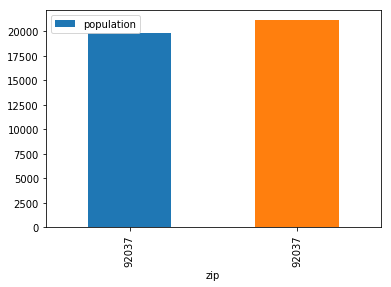

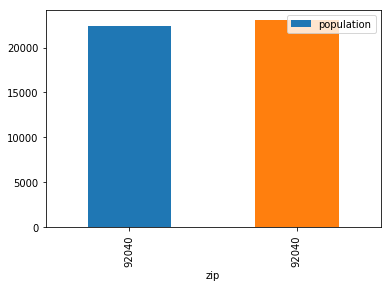

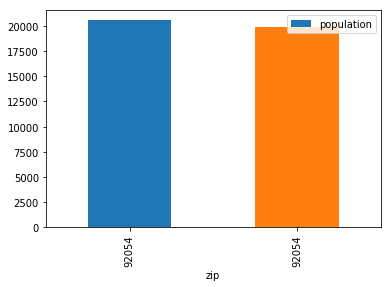

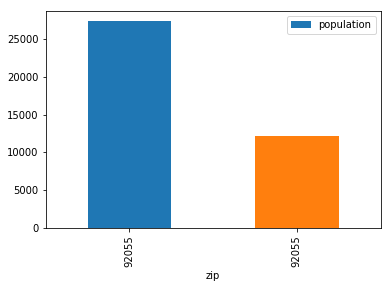

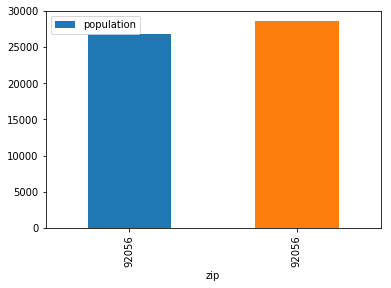

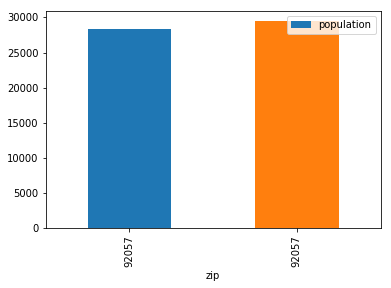

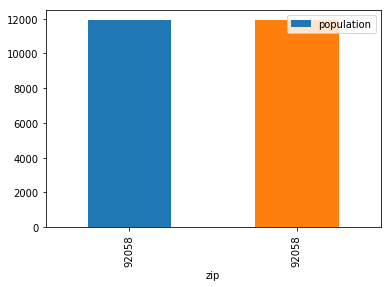

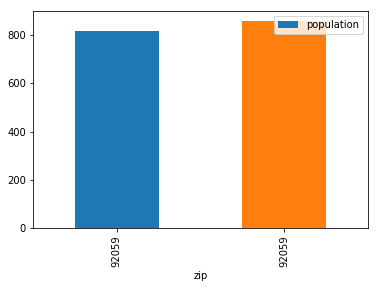

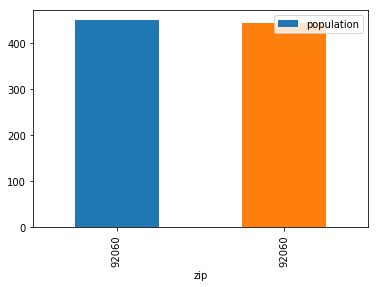

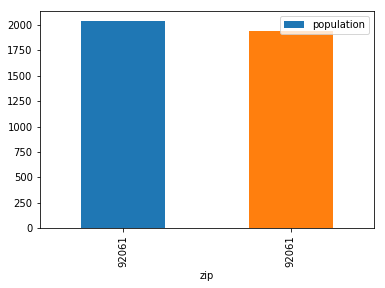

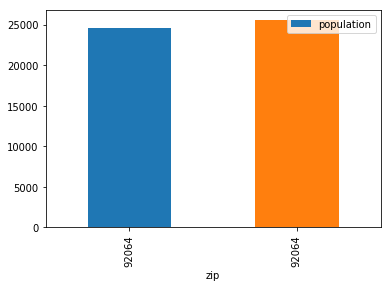

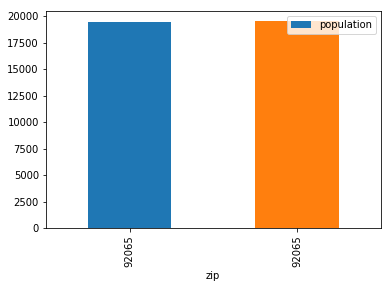

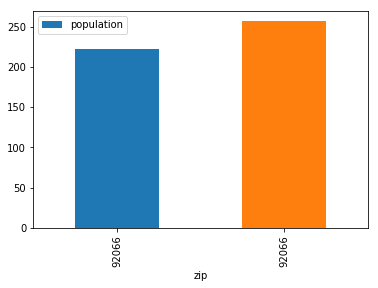

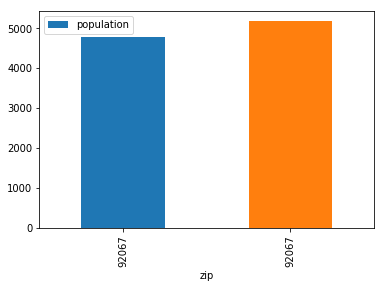

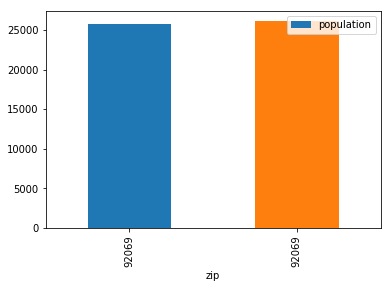

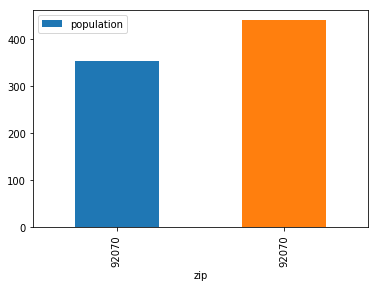

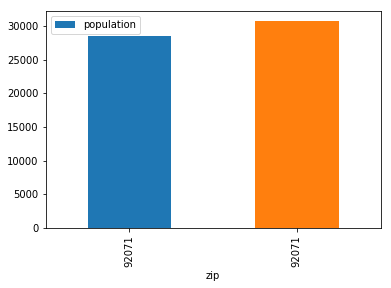

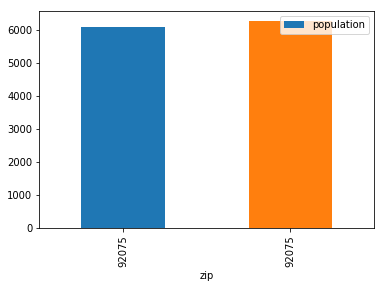

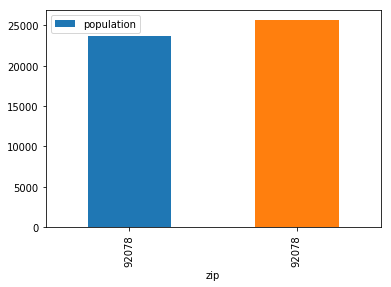

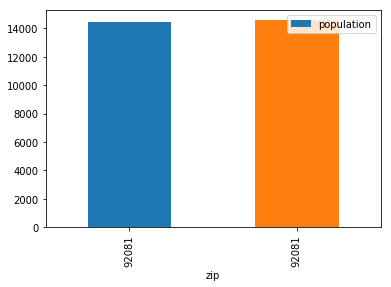

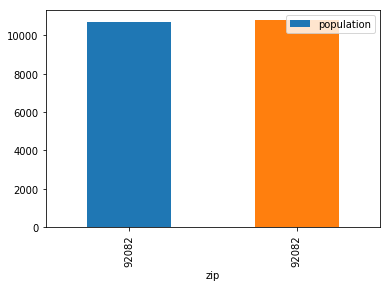

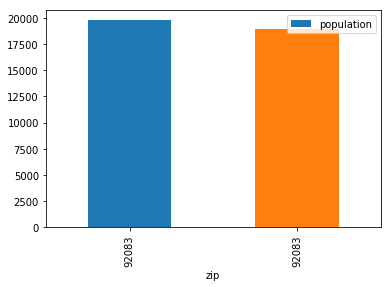

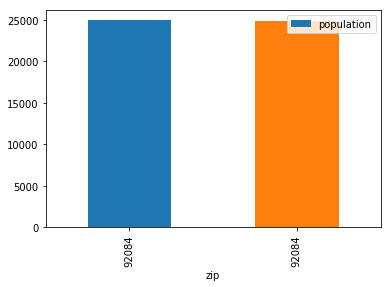

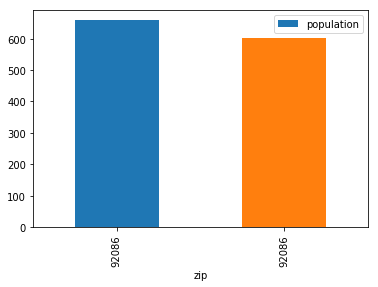

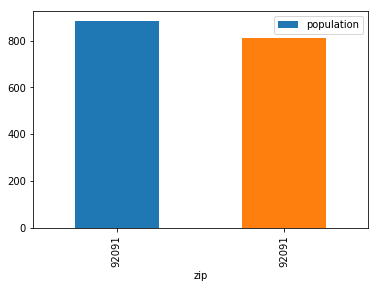

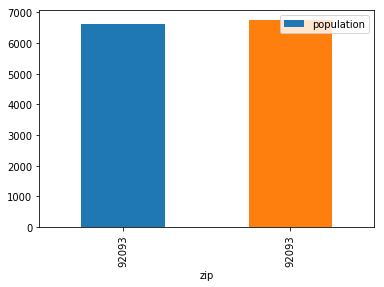

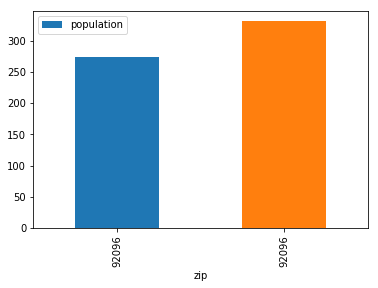

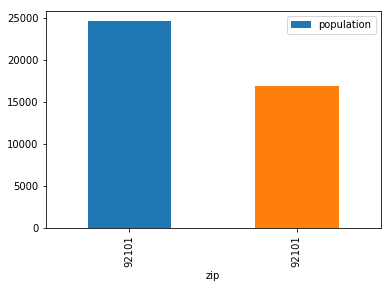

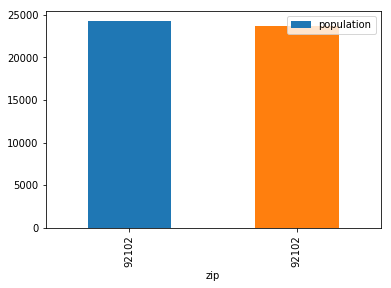

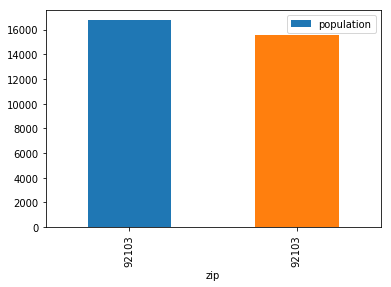

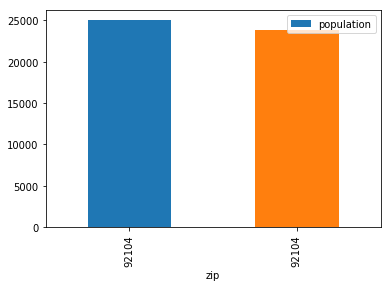

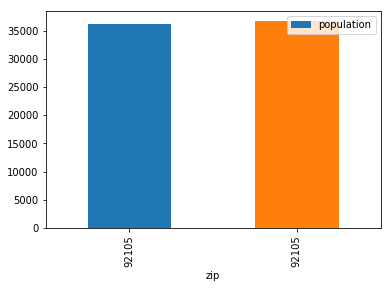

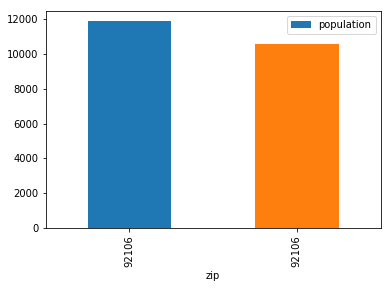

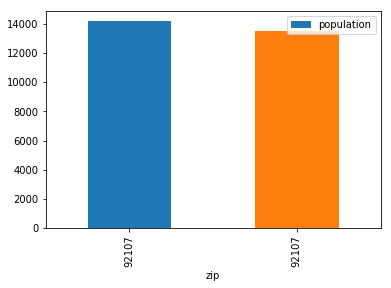

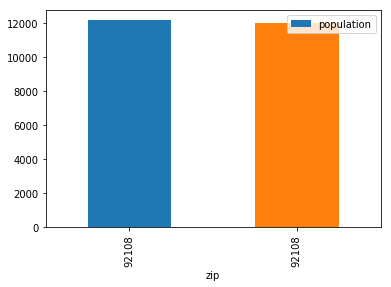

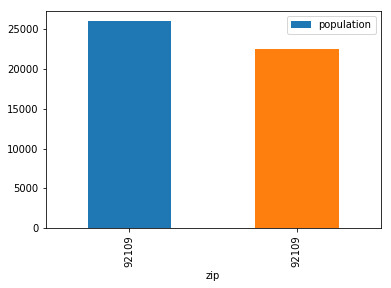

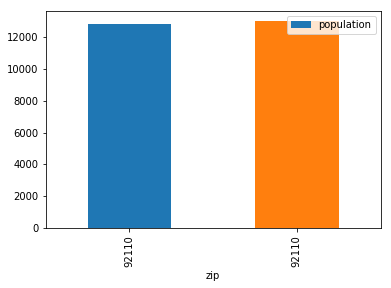

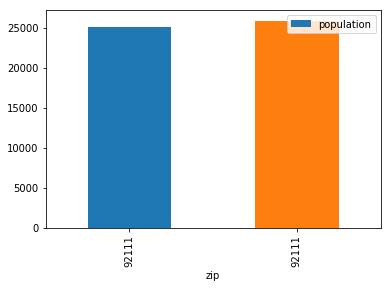

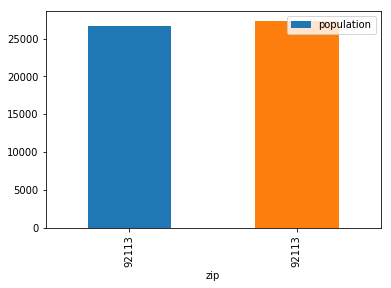

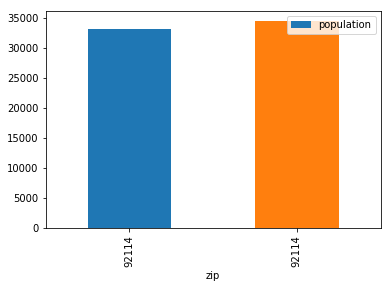

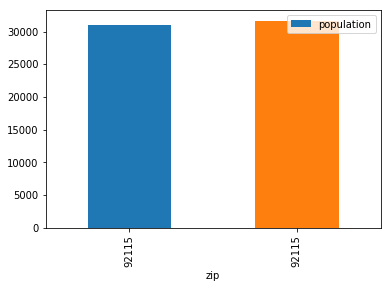

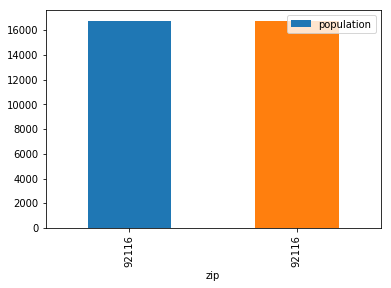

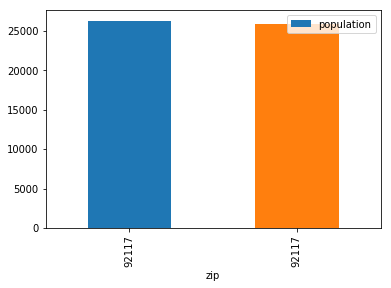

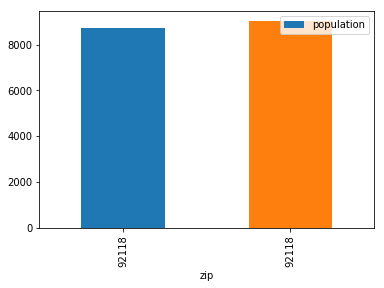

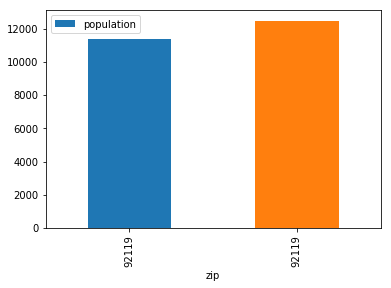

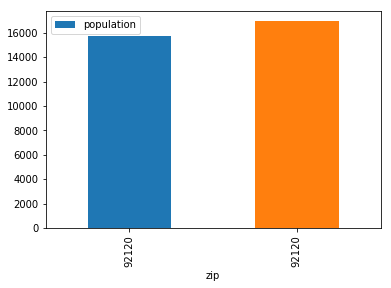

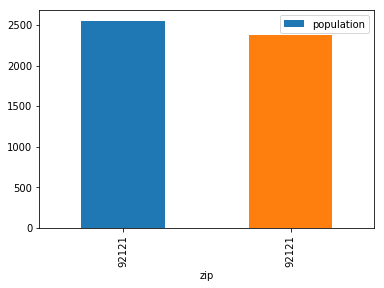

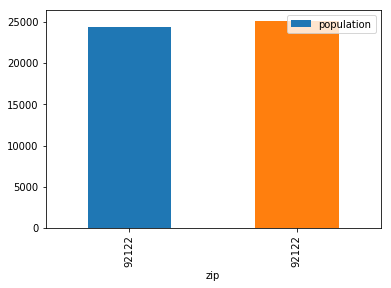

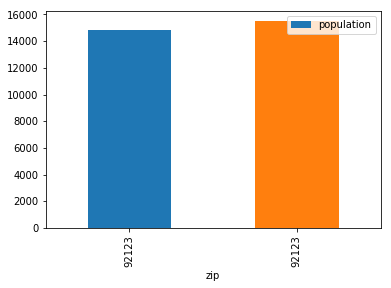

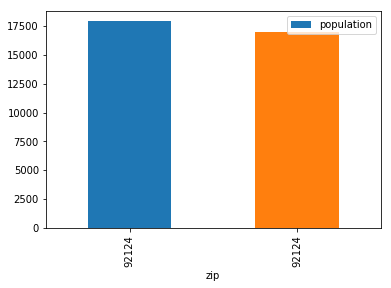

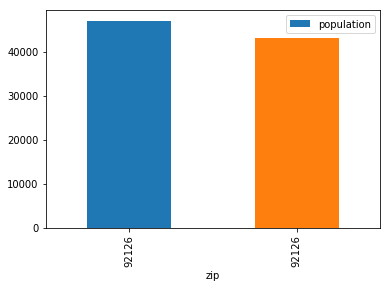

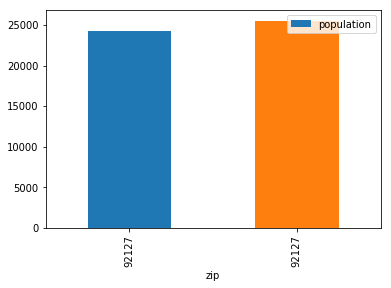

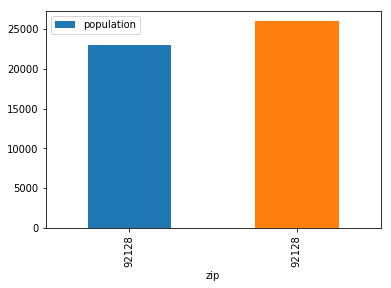

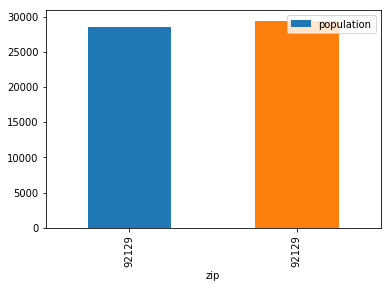

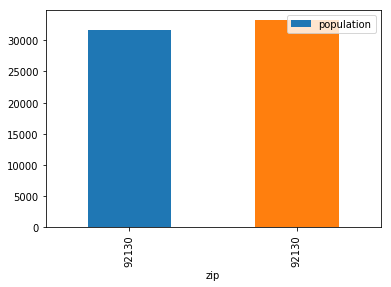

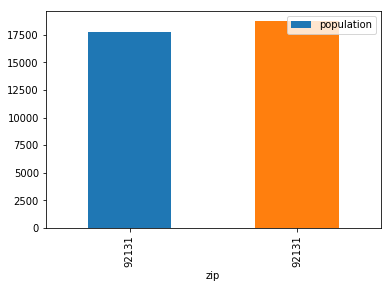

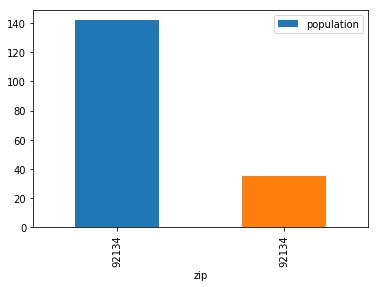

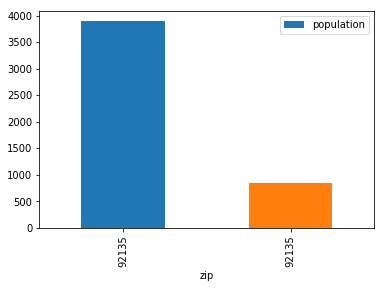

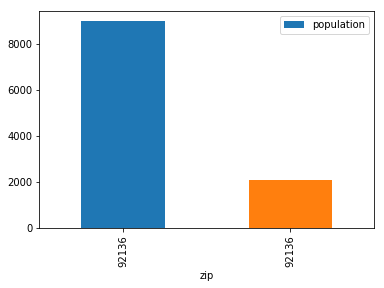

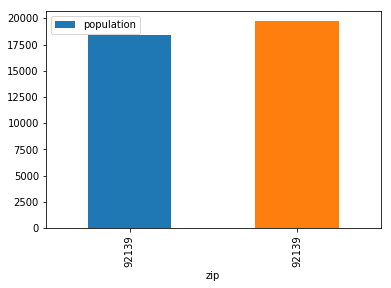

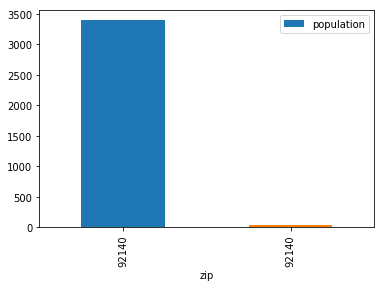

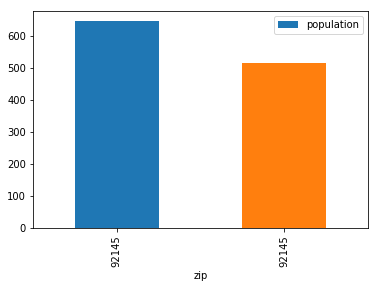

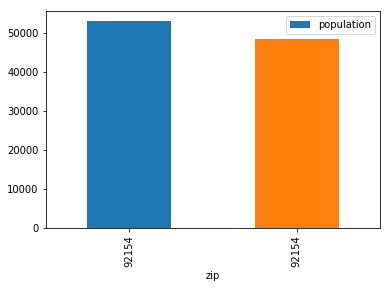

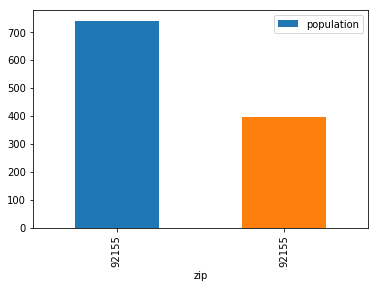

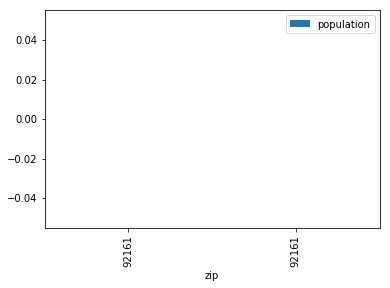

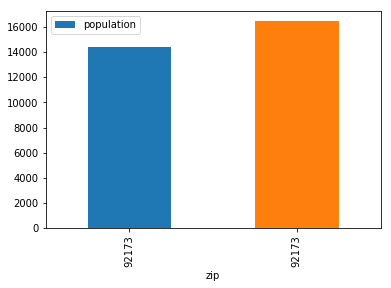

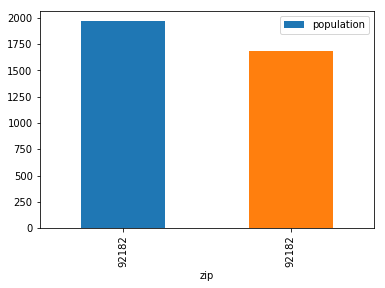

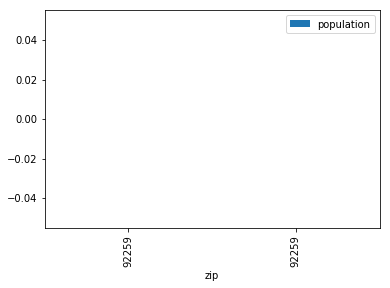

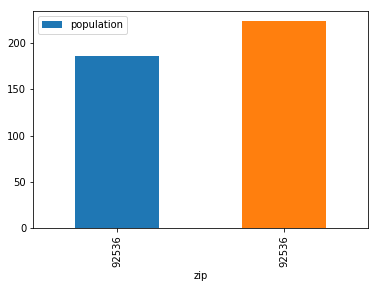

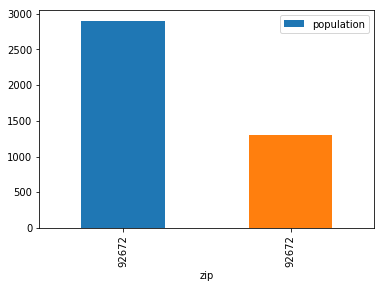

In [32]:
#plt.figure(figsize=(15,20))
age_estimate_all_gp.plot(x='zip', y='population', kind='bar')
plt.show()

In [3]:
zip_region= pd.read_csv('ZipCode_File/Zip_MedianValuePerSqft_AllHomes.csv')
zip_region= zip_region.loc[zip_region['CountyName'] == 'San Diego']
zip_region[['RegionName', 'City', 'Metro', 'CountyName']].drop_duplicates()

,RegionName,City,Metro,CountyName
120,91910,Chula Vista,San Diego-Carlsbad,San Diego
179,92126,San Diego,San Diego-Carlsbad,San Diego
200,91911,Chula Vista,San Diego-Carlsbad,San Diego
224,92109,San Diego,San Diego-Carlsbad,San Diego
227,92101,San Diego,San Diego-Carlsbad,San Diego
256,92021,El Cajon,San Diego-Carlsbad,San Diego
436,92154,San Diego,San Diego-Carlsbad,San Diego
437,92104,San Diego,San Diego-Carlsbad,San Diego
441,92115,San Diego,San Diego-Carlsbad,San Diego
495,92105,San Diego,San Diego-Carlsbad,San Diego
